In [1]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
my_data <- read.csv("api.csv")

In [3]:
colnames(my_data) <- c("first_name", "last_name", "uniqname", "umid", "activity", "school", "program")

In [4]:
my_data <- tibble(my_data)

In [ ]:
my_data %>% head

In [6]:
student_status <- my_data %>% group_by(activity) %>% count
student_status

activity,n
<chr>,<int>
"""Active Student""",1098
"""Inactive Student""",3425
"""Never a Student""",3649


In [7]:
active_distribution <- my_data %>% filter(activity == "\"Active Student\"") %>% group_by(program) %>% count

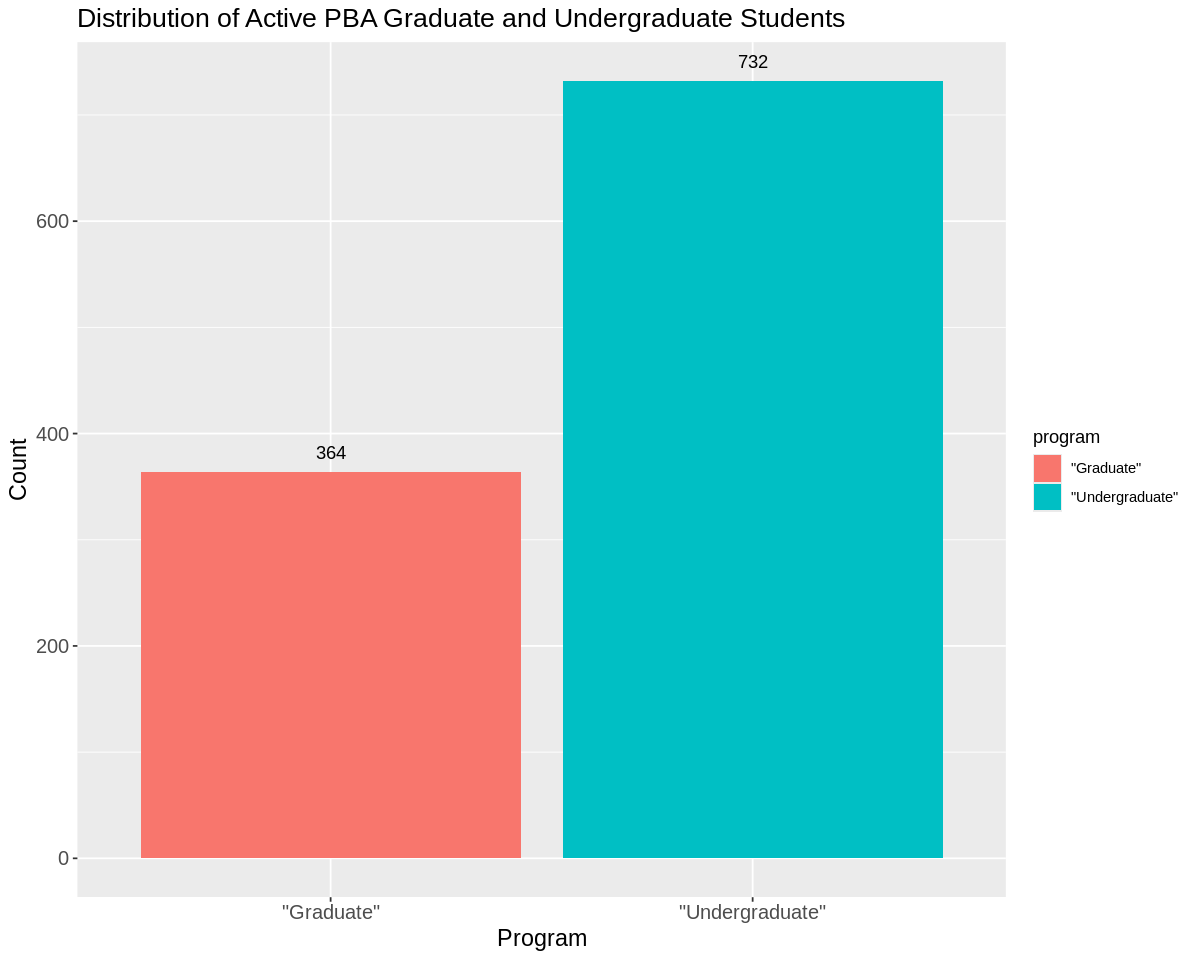

In [9]:
active_distribution %>%
  filter(program == "\"Graduate\"" | program == "\"Undergraduate\"") %>%
  ggplot(aes(x = program, y = n, fill = program)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = n), vjust = -1) +
  labs(x = "Program", y = "Count", title = "Distribution of Active PBA Graduate and Undergraduate Students") +
  theme(
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    plot.title = element_text(size = 16)
  )

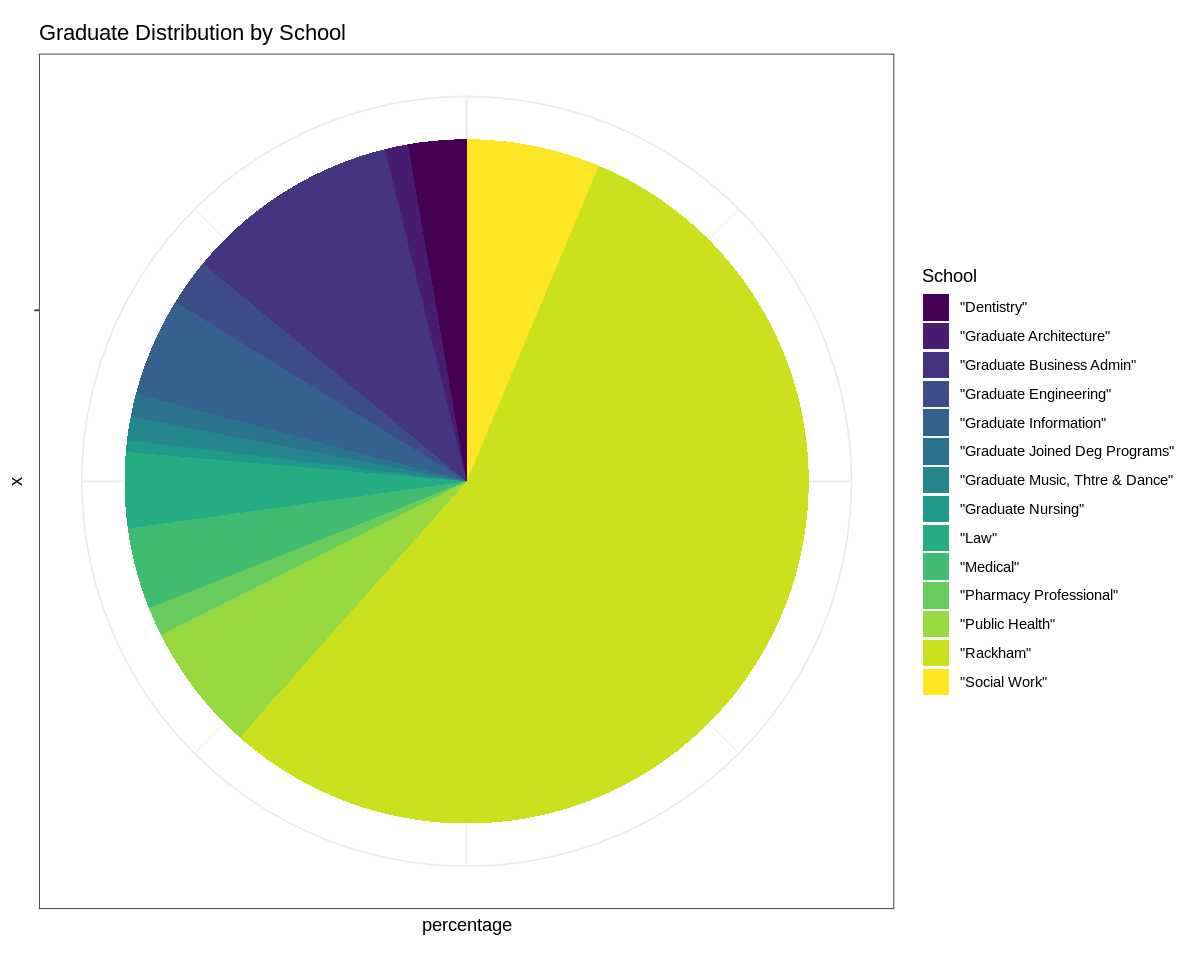

In [38]:
library(viridis)

graduate_distribution <- my_data %>%
  filter(activity == "\"Active Student\"" & program == "\"Graduate\"") %>%
  group_by(school) %>%
  count() %>%
  arrange(desc(n))

total_graduates <- sum(graduate_distribution$n)
graduate_distribution %>%
  mutate(percentage = n / total_graduates * 100) %>%
  ggplot(aes(x = "", y = percentage, fill = school)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_bw() +
  labs(title = "Graduate Distribution by School", fill = "School") +
  theme(axis.text.x = element_blank()) +
  scale_fill_viridis(discrete = TRUE)

In [43]:
total_undergraduates <- my_data %>%
  filter(activity == "\"Active Student\"" & program == "\"Undergraduate\"") %>%
  count() %>%
  pull(n)
undergrad_distribution <- my_data %>%
  filter(activity == "\"Active Student\"" & program == "\"Undergraduate\"") %>%
  group_by(school) %>%
  count() %>%
  arrange(desc(n)) %>%
  mutate(percentage = n / total_undergraduates * 100)

print(undergrad_distribution)

# A tibble: 15 × 3
# Groups:   school [15]
   school                                   n percentage
   <chr>                                <int>      <dbl>
 1 "\"Undergraduate LSA\""                478     65.3  
 2 "\"Undergraduate Engineering\""         92     12.6  
 3 "\"Undergraduate Business Admin\""      61      8.33 
 4 "\"Undergraduate Information\""         15      2.05 
 5 "\"Undergraduate Art and Design\""      14      1.91 
 6 "\"Undergraduate Nursing\""             14      1.91 
 7 "\"Undergraduate Architecture\""        12      1.64 
 8 "\"Undergraduate Kinesiology\""         12      1.64 
 9 "\"Undergraduate Public Health\""       11      1.50 
10 "\"Undergrad Music, Thtre & Dance\""    10      1.37 
11 "\"Undergraduate Public Policy\""        6      0.820
12 "\"Undergraduate Non-Degree\""           3      0.410
13 "\"Undergraduate Medicine\""             2      0.273
14 "\"Undergraduate Education\""            1      0.137
15 "\"Undergraduate Pharmacy\""             1

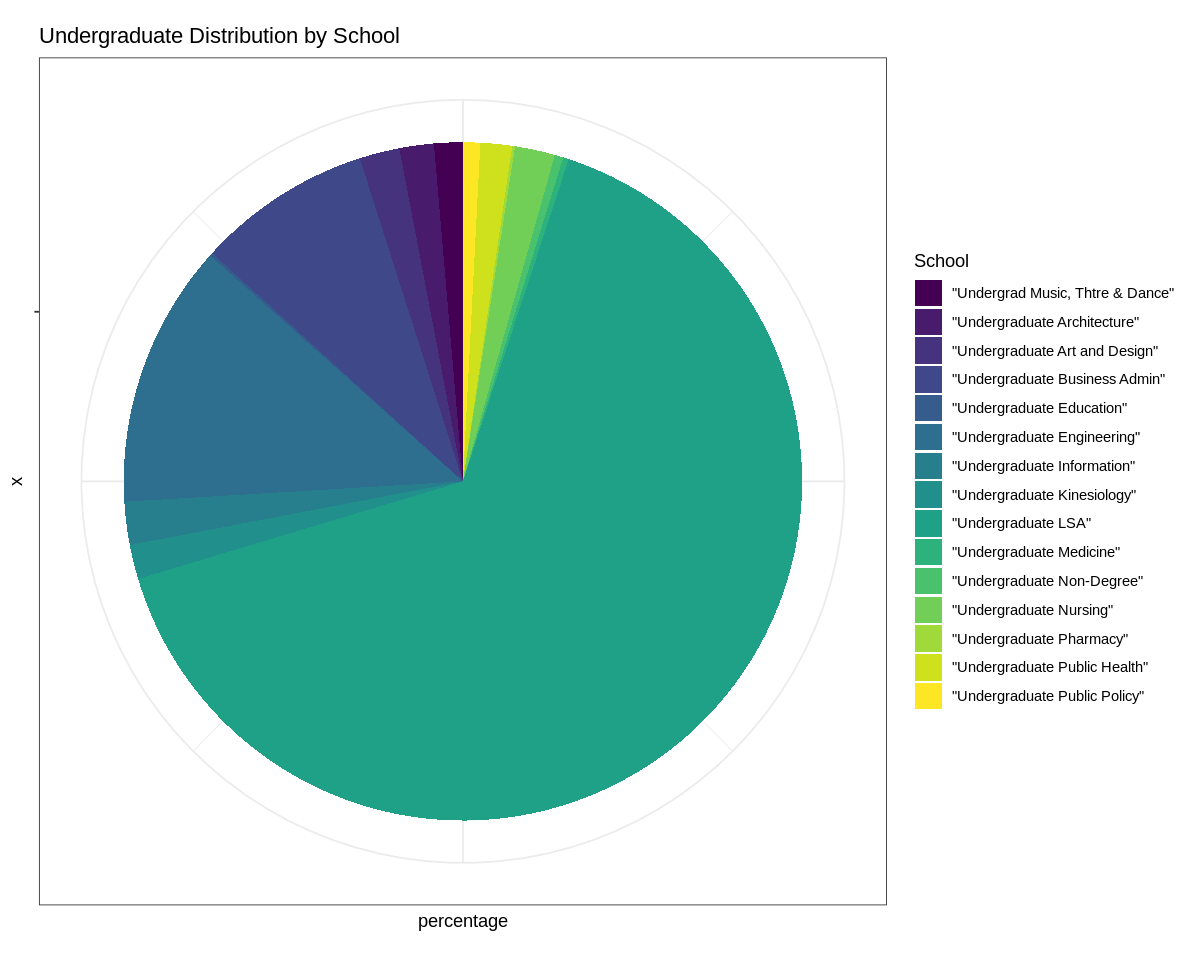

In [45]:
undergrad_distribution <- my_data %>%
  filter(activity == "\"Active Student\"" & program == "\"Undergraduate\"") %>%
  group_by(school) %>%
  count() %>%
  arrange(desc(n))

total_undergraduates <- sum(undergrad_distribution$n)

undergrad_distribution %>%
  mutate(percentage = n / total_undergraduates * 100) %>%
  ggplot(aes(x = "", y = percentage, fill = school)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_bw() +
  labs(title = "Undergraduate Distribution by School", fill = "School") +
  theme(axis.text.x = element_blank()) +
  scale_fill_viridis(discrete = TRUE)